# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle 
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

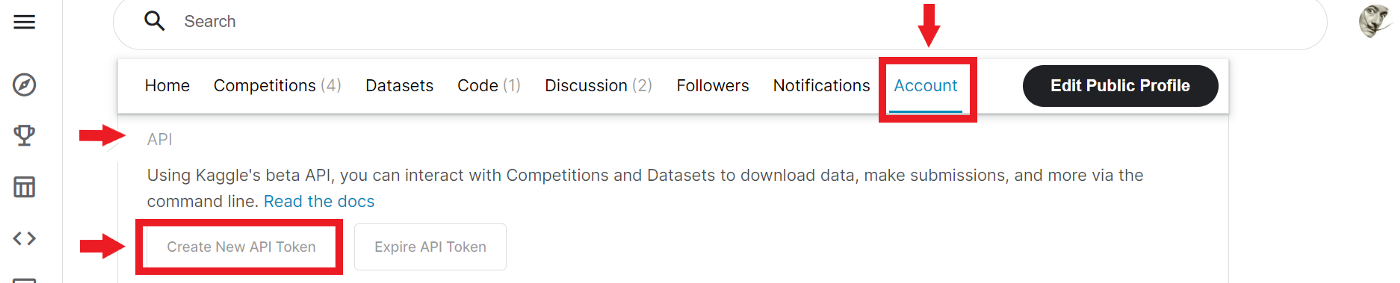

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# 1. Qual o endereço do seu notebook (colab) executado? Use o botão de compartilhamento do colab para obter uma url.
https://colab.research.google.com/drive/1NvHFrEuEHM-xE8_poyvBueplUhtxpaG8?usp=sharing



# 4.Em qual célula está o download dos dados diretamente do kaggle?

## Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json 

Crie a pasta .kaggle

In [2]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'cp' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'chmod' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


Baixe o dataset

In [ ]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [2]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")
df

d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...
...,...,...,...,...,...,...
167048,"Em cenário de crise, tucano Beto Richa assume ...",O tucano Beto Richa tinha tudo para começar se...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167049,Filho supera senador Renan Calheiros e assume ...,O economista Renan Filho (PMDB) assume nesta q...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167050,"Hoje na TV: Tottenham x Chelsea, Campeonato In...",Destaques da programação desta quinta-feira (1...,2015-01-01,esporte,NaN,http://www1.folha.uol.com.br/esporte/2015/01/1...
167051,Kim Jong-un diz estar aberto a se reunir com p...,"O líder norte-coreano, Kim Jong-un, disse nest...",2015-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2015/01/156...


# 3.Em qual célula está o código que atualiza o spacy e instala o pacote pt_core_news_lg?


## Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [3]:
# Escreva seu código aqui
#!pip install -U spacy
#!python -m spacy download pt_core_news_lg
# ...

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# 2.Em qual célula está o código que realiza o download dos pacotes necessários para tokenização e stemming usando nltk?
Na célula abaixo, onde importo o nltk e instalo suas dependências

## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [4]:
import nltk

# Escreva seu código aqui
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

import pyLDAvis
#import pyLDAvis.sklearn

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# 5. Em qual célula está a criação do dataframe news_2016 (com examente 7943 notícias)?

## Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [6]:
df['date'] = pd.to_datetime(df.date)

# Create a dataframe named news_2016
news_2016 = df[(df['category'] == 'mercado') & (df['date'].dt.year == 2016)]
news_2016.shape

(7943, 6)

# 6. Em qual célula está a função que tokeniza e realiza o stemming dos textos usando funções do nltk?

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). 
Para tal, complete o conteúdo da função `tokenize`.

In [ ]:

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`
  
  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  stemmer = nltk.stem.RSLPStemmer()
  tokens = nltk.tokenize.word_tokenize(text.lower())
  stems = [stemmer.stem(token) for token in tokens]
  return stems

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)
news_2016['nltk_tokens']

# 9. Em qual célula o modelo pt_core_news_lg está sendo carregado? Todos os textos do dataframe precisam ser analisados usando os modelos carregados. Em qual célula isso foi feito?

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [ ]:
# Escreva seu código aqui
nlp = spacy.load('pt_core_news_lg')

def apply_spacy(text: str):
  doc = nlp(text)
  return doc

news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(apply_spacy)

# 7. Em qual célula está a função que realiza a lematização usando o spacy?

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as 
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [ ]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()
trash_list = ['o','em','em o', 'em a', 'ano', 'de', 'de o', 'de a']

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    #Se o Token está em complete_stop_words ou se o Lemma esta contido na lista trash_list retorna Falso
    w_str = str(w.lemma_)
    if w_str in complete_stopwords or w_str in trash_list:
      return False
    #Se o token for alfanumérico e não atender aos criterios anteriores retorna True  
    elif w_str.isalpha():
      return True  
    else:
      return False

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """ 
    lemmas = []
    for w in doc:
      if filter(w):
        lemmas.append(w.lemma_.lower())
    return lemmas

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

# 8. Baseado nos resultados qual a diferença entre stemming e lematização, qual a diferença entre os dois procedimentos? Escolha quatro palavras para exemplificar.

O stemming procura o radical da palavra enquanto a lematização a raiz da palavra, como por exemplo:

 - Desenhar -> Stem: Desenh, Lemma: Desenho
 - Amigos -> Stem: Amig, Lemma: Amigo
 - Correndo -> Stem: Corre, Lemma: Correr
 - Fazendeiro -> Stem: Fazend, Lemma: Fazenda

# 10. Indique a célula onde as entidades dos textos foram extraídas. Estamos interessados apenas nas organizações.

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [ ]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  orgs = []
  for w in doc:
    if w.ent_type_ == 'ORG':
      orgs.append(w)
  return orgs

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

# 12. Quando adotamos uma estratégia frequentista para converter textos em vetores, podemos fazê-lo de diferentes maneiras. Mostramos em aula as codificações One-Hot, TF e TF-IDF. Explique a principal motivação em adotar TF-IDF frente as duas outras opções.

O OneHotEncoding é um metodo que indica, de forma binaria, se o termo está presente no texto não levando em consideração a importância relativa a frequência. O TF verifica a frequência que o termo aparece em um texto e leva em consideração a frequência contida no único texto e não no corpus como um todo. O TF-IDF considera tanto a frequência do termo no documento (TF) quanto a frequência inversa do termo no corpus (IDF). O IDF penaliza termos que são muito frequentes em todo o corpus, pois eles têm menos poder discriminativo enquanto da mais importância pra termos que aparecem menos. De forma geral, o melhor de se usar o TF-IDF é capturar a importância dos termos em todo o seu documento. 

# 13. Indique a célula onde está a função que cria o vetor de TF-IDF para cada texto. 

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF. 
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos. 

In [ ]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None

  
  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      doc_text = [' '.join(tokens) for tokens in self.doc_tokens]
      self.tfidf = TfidfVectorizer(max_features=5000, min_df=10, lowercase=True, stop_words=['de'])

      tfidf_matrix = self.tfidf.fit(doc_text)

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
  tokens = ' '.join(tokens)
  array =  vectorizer().transform([tokens]).toarray()[0]
  return array

news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

# 14. Indique a célula onde estão sendo extraídos os tópicos usando o algoritmo de LDA.

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [82]:
doc_text = [' '.join(tokens) for tokens in doc_tokens]
N_TOKENS = 9
corpus = vectorizer.tfidf.transform(doc_text)


#Escreva seu código aqui
lda_model = LDA(n_components=N_TOKENS, max_iter=100, random_state=SEED)
lda_model.fit(corpus)
topics = lda_model.transform(corpus)

In [83]:
list_of_topics = [array for array in topics]
news_2016['topics_lda'] = list_of_topics
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topics_lda,doc_lengths,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[``, sou, apen, a, mulh, de, um, fazend, '', ,...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem, do, Impé...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9142234062351817, 0.010712403381415233, 0.0...",341,0
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, pós-pag, ou, control, fic...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA, BRIG...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.35437672950927157, 0.013984630849632935, 0....",93,3
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo, dos, três, Estados, Assembleias, l...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.009970136351458237, 0.009956016161340647, 0...",388,3
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto, de, Tecnologia, de, Massachus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9242938085661436, 0.009459041252871931, 0.0...",327,0
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, &, letr, selec, seman, lanç, na, áre...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[NACIONAIS, , Presidente, da, Singularity, Un...","[0.0, 0.03883755154242663, 0.0, 0.0, 0.0, 0.0,...","[0.8956888380848543, 0.01303559399378028, 0.01...",168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, ,, do, banc, ...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, banco, santande...","[FGV, Ibre]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.012236137429002666, 0.012211990422805482, 0...",102,5
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, ,, saúd, ,, boa, form, e, praz, ., a...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu...","[Nielsen, Nielsen, Nielsen, Nielsen, OFF, !, A...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5794145601056063, 0.010266191614448042, 0.0...",353,0
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, ,, mais, pesso, são, ...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi...","[Jovens, LCA, LCA, MAIOR, NA, BA

# 15. Indique a célula onde a visualização LDAVis está criada.

### Visualize os tópicos usando a ferramenta pyLDAVis

In [ ]:
doc_text = [' '.join(tokens) for tokens in doc_tokens]
vector = vectorizer.tfidf.transform(doc_text)
news_2016['doc_lengths'] = news_2016['spacy_lemma'].apply(lambda data: len(data))
norm = lambda data: pd.DataFrame(data).div(data.sum(1), axis=0).values
doc_topic_dists = norm(lda_model.transform(vector))

pyLDAvis.enable_notebook()
visualization = pyLDAvis.prepare(topic_term_dists= norm(lda_model.components_), 
                                 doc_topic_dists= doc_topic_dists, 
                                 doc_lengths=news_2016.doc_lengths.values.tolist(), 
                                 vocab=vectorizer.tfidf.get_feature_names_out(), 
                                 term_frequency=vector.sum(axis=0).tolist()[0])
pyLDAvis.display(visualization)

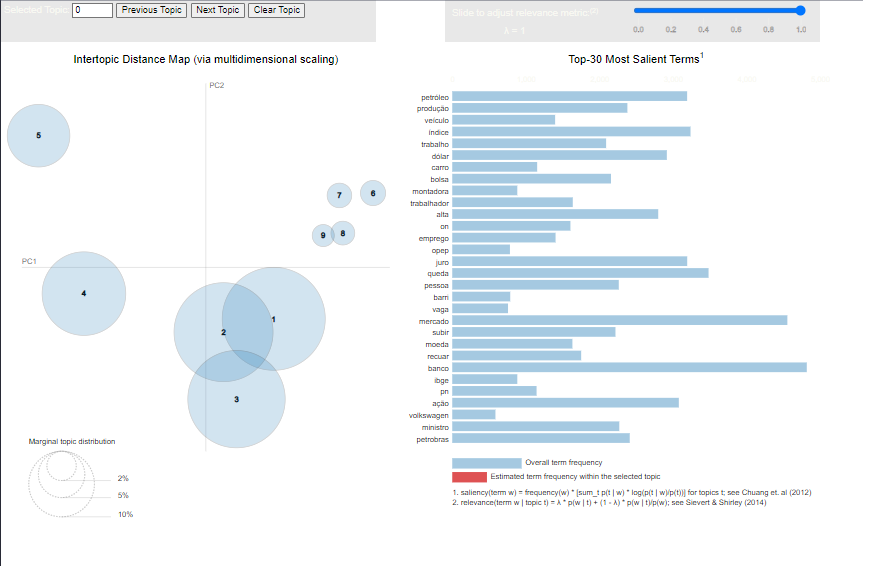

### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [85]:
indexes = np.argmax(topics, axis=1)
indexes

array([0, 3, 3, ..., 5, 5, 7], dtype=int64)

## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

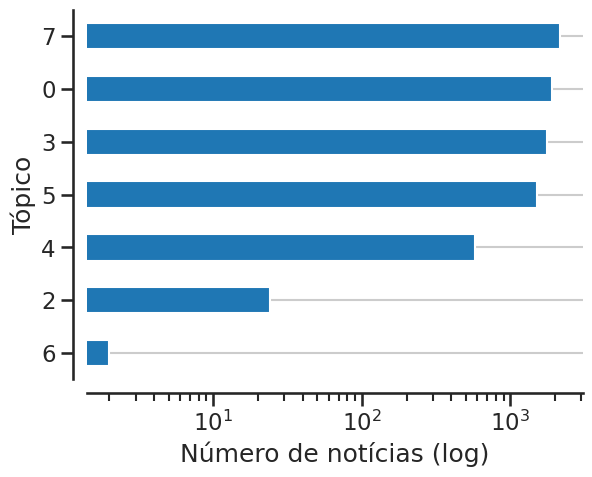

In [86]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

# 16. Cole a figura com a nuvem de palavras para cada um dos 9 tópicos criados.

In [87]:
for idx in range(N_TOKENS):
    topic_count = len(news_2016[news_2016['topic'] == idx + 1])
    print(f"Tópico {idx + 1}: {topic_count} documentos")


Tópico 1: 0 documentos
Tópico 2: 24 documentos
Tópico 3: 1765 documentos
Tópico 4: 575 documentos
Tópico 5: 1504 documentos
Tópico 6: 2 documentos
Tópico 7: 2173 documentos
Tópico 8: 0 documentos
Tópico 9: 0 documentos


## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s

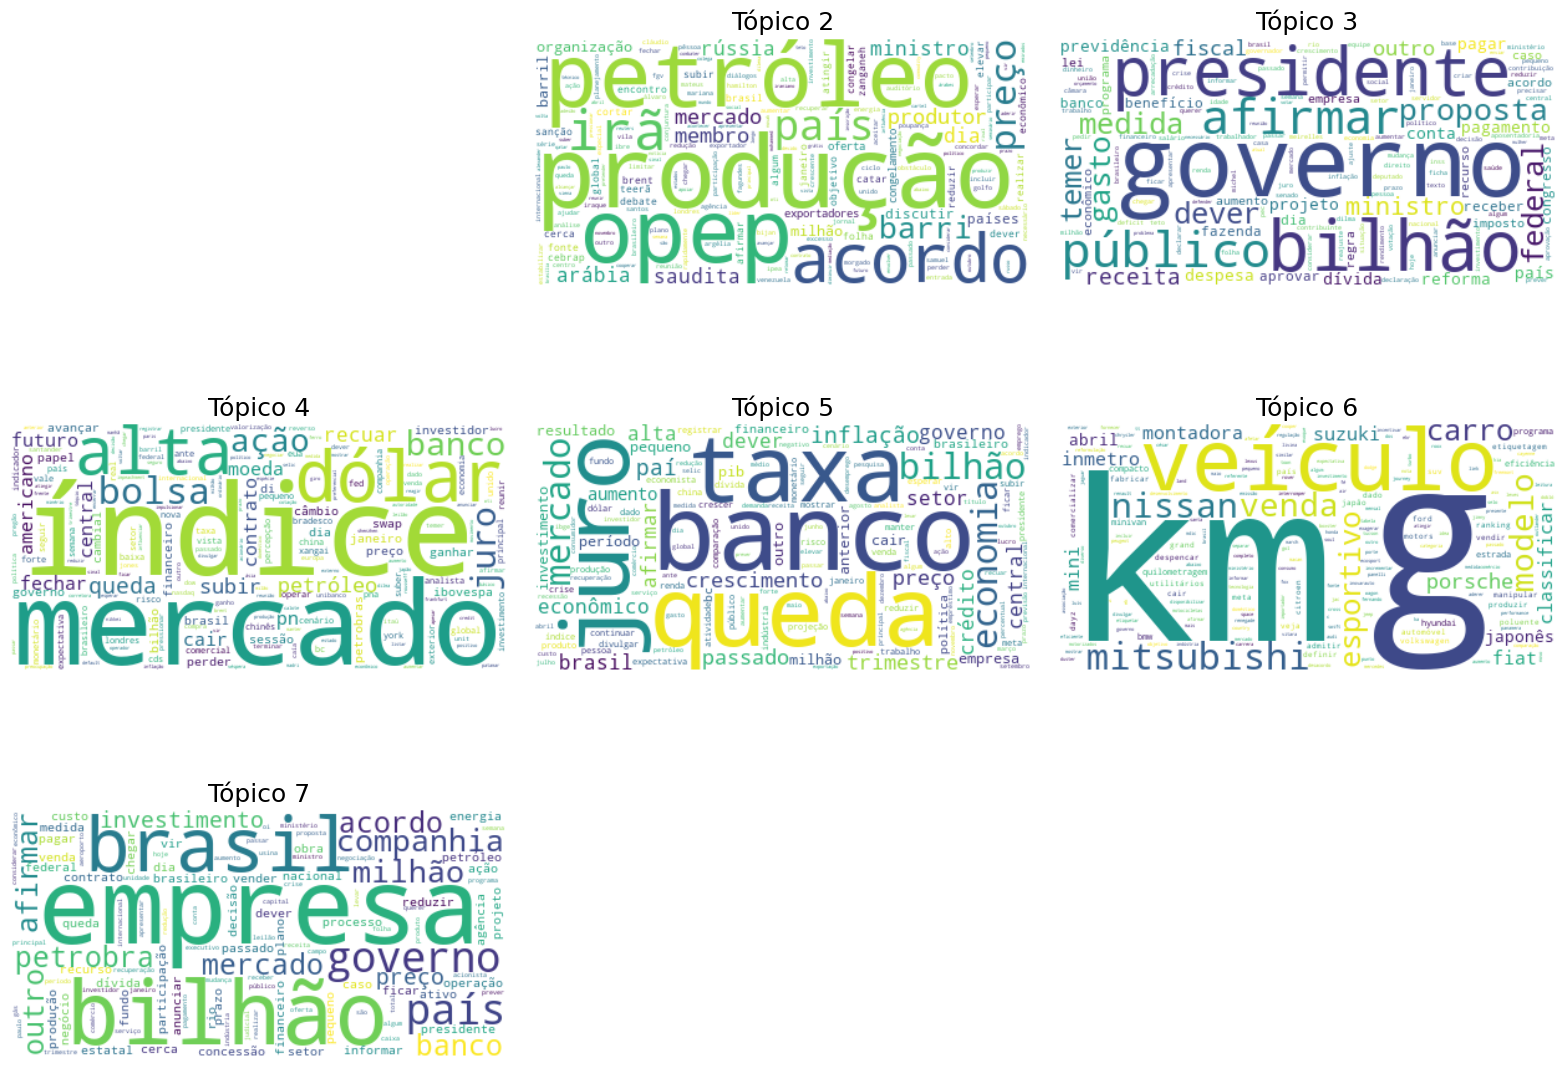

In [88]:
from wordcloud import WordCloud

def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    # return ax

    wordcloud = WordCloud(background_color='white', collocations=False).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax
    
def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

# 17. Escreva brevemente uma descrição para cada tópico extraído. Indique se você considera o tópico extraído semanticamente consistente ou não. 

- Topico 2: Se refere à industria petrolera e o comercio exterior de petroleo, com grande destaque para as palavrar opep (Organização dos Países Exportadores de Petróleo) e Petróleo
- Topico 3: Se refere à organização politica, tendo destaque para as palavras Governo e Presidente
- Topico 4: Se refere ao mercado de investimentos, tendo destaque das palavras mercado, bolsa e dólar
- Topico 5: Se refere ao mercado volatil Brasileiro, tendo destaque das palavras banco, queda e juros
- Topico 6: Se refere a montadoras e veículos, tendo destaque de marcas de montadoras de carro
- Topico 7: Muito parecido com o topico 5, se refere à empresas e companhias brasileiras. 

# 11. Cole a figura gerada que mostra a nuvem de entidades para cada tópico obtido (no final do notebook)

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
d:\2 - PÓS GRADUAÇÃO\NLP com Python\NLP\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s

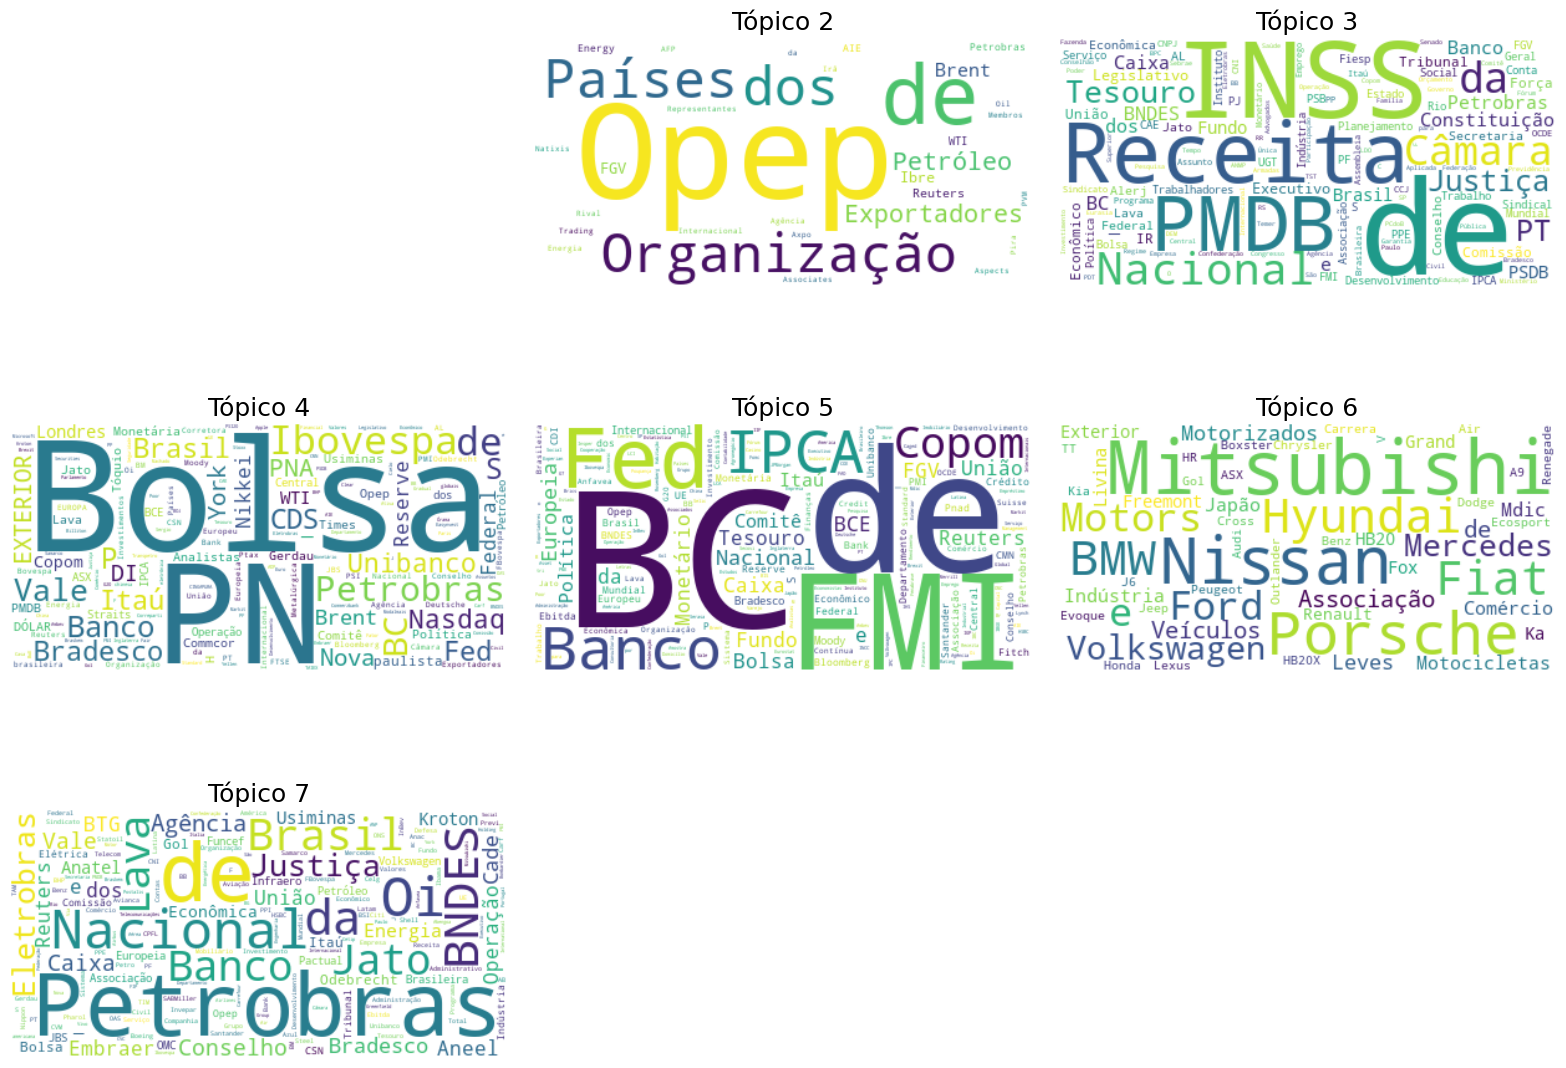

In [90]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [str(w).replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

# 18. Neste projeto, usamos TF-IDF para gerar os vetores que servem de entrada para o algoritmo de LDA. Quais seriam os passos para gerar vetores baseados na técnica de Doc2Vec?

1. Pré-processamento dos textos.
2. Preparação dos dados: representação dos documentos como listas de palavras.
3. Criação do modelo Doc2Vec com parâmetros desejados.
4. Construção do vocabulário.
5. Treinamento do modelo com os dados de entrada.
6. Obtenção dos vetores de documentos usando o método `infer_vector`.
7. Utilização dos vetores de documentos para tarefas específicas.

# 19. Em uma versão alternativa desse projeto, optamos por utilizar o algoritmo de K-Médias para gerar os clusters (tópicos). Qual das abordagens (TF-IDF ou Doc2Vec) seria mais adequada como processo de vetorização? Justifique com comentários sobre dimensionalidade e relação semântica entre documentos.

A abordagem mais adequada vai depender das condições que precisamos fornecer. No caso de usar K-Means, a dimensionalidade é um fator critico, levando em consideração que devido a natureza do algoritmo, quanto maior a dimensão mais dificil do KMeans agrupar os dados, e nesse aspecto o TF-IDF se sobressairia, por ter a capacidade de diminuir a dimensionalidade.Entretanto, se o valor semântico for mais importante, usar o Doc2Vec seria uma opeção melhor.

# 20. Leia o artigo "Introducing our Hybrid lda2vec Algorithm" (https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=). O algoritmo lda2vec pretende combinar o poder do word2vec com a interpretabilidade do algoritmo LDA. Em qual cenário o autor sugere que há benefícios para utilização deste novo algoritmo?

O Autor diz que o Ida2Vec combina o LDA e o Word2Vec. A sugestão é que o algortimo seja utilizado quando a interpetração dos tópicos e a avaliação semântica sejam, ambos, importantes. Por isso, o algoritmo combina a capacidade de interpretabilidade do LDA com a técnica de capturar o valor semântico das palavras do Word2Vec.